# 1) Явный метод Рунге-Кутты 4го порядка

## Сам явный метод Рунге-Кутта 4-го порядка:

$$
\begin{align*}
k_1 &= f(t_n, y_n), \\
k_2 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_1\right), \\
k_3 &= f\left(t_n + \frac{h}{2}, y_n + \frac{h}{2}k_2\right), \\
k_4 &= f\left(t_n + h, y_n + h k_3\right), \\
y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4).
\end{align*}
$$

Его таблица Бутчера:
|       |       |       |       |       |
|-------|-------|-------|-------|-------|
| **0** | 0     | 0     | 0     | 0     |
| **1/2**| 1/2   | 0     | 0     | 0     |
| **1/2**| 0     | 1/2   | 0     | 0     |
| **1**  | 0     | 0     | 1     | 0     |
|       | **1/6**| **1/3**| **1/3**| **1/6**|

$$
A =
\begin{pmatrix}
0   & 0   & 0   & 0 \\
1/2 & 0   & 0   & 0 \\
0   & 1/2 & 0   & 0 \\
0   & 0   & 1   & 0
\end{pmatrix}
$$

$$
b =
\begin{pmatrix}
1/6 & 1/3 & 1/3 & 1/6
\end{pmatrix}
$$

$$
c =
\begin{pmatrix}
0   \\
1/2 \\
1/2 \\
1
\end{pmatrix}
$$

## Исследуем наш метод на A-устойчивость и L-устойчивость:

$$
R(z) = \frac{\det(I - zA + z e b^T)}{\det(I - zA)}.
$$
Применим и получим функцию устойчивости:
$$R(z) = 1 + z + \frac{z^2}{2} + \frac{z^3}{6} + \frac{z^4}{24}$$

### А-устойчивость

Метод называется А-устойчивым, если для всех $ z \in \mathbb{C} $ с $\operatorname{Re}(z) \leq 0$ выполняется условие: $ |R(z)| \leq 1$.

Вбив в Desmos график функции устойчивости можно легко убедиться, что метод не будет A-устойчивым

### L-устойчивость

$$
\begin{align*}
\lim_{z\to\infty}R(z)=\lim_{z\to\infty}\left(1+z+\frac{z^2}{2}+\frac{z^3}{6}+\frac{z^4}{24}\right)=\infty
\end{align*}
$$

Получаем, что метод для L-устойчивости не выполняется ни одно из условий

Делаем вывод, что для данного уравнения
1) Метод не A-уст
2) Метод не L-уст

# Эксперимент

Вбив в Desmos график функции устойчиовсти можно понять, что он будет устойчив при $|z| < 2.8 $
Из уранения понятно так же, что $\lambda_{max} \approx 10^7$.
Тогда $h \approx 10^{-7}$

Однако для такого шага нам не хватит оперативной памяти и мощностей процессора для вычислений. Из-за чего этот алгоритм не подходит для нашего уравнения. В реальности нам хватит памяти только лишь для $h \approx 10^{-4}$. Уравнение слишком быстро убывающее.







In [3]:
# Устойчивость

lambda_j = -1e7
h = 1e-4
z = h * lambda_j

print(f'R(z) = {abs(1 + z + (z ** 2) / 2 + (z ** 3) / 6 + (z ** 4)/ 24)}')

R(z) = 41500499001.0


C:\Users\maslo\AppData\Local\Temp\ipykernel_7512\2275995999.py:9: RuntimeWarning: overflow encountered in scalar multiply
  dy1dt = -0.04 * y1 + 1e4 * y2 * y3
C:\Users\maslo\AppData\Local\Temp\ipykernel_7512\2275995999.py:10: RuntimeWarning: overflow encountered in scalar multiply
  dy2dt = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2**2
C:\Users\maslo\AppData\Local\Temp\ipykernel_7512\2275995999.py:10: RuntimeWarning: overflow encountered in scalar power
  dy2dt = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2**2
C:\Users\maslo\AppData\Local\Temp\ipykernel_7512\2275995999.py:10: RuntimeWarning: invalid value encountered in scalar subtract
  dy2dt = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2**2
C:\Users\maslo\AppData\Local\Temp\ipykernel_7512\2275995999.py:11: RuntimeWarning: overflow encountered in scalar power
  dy3dt = 3e7 * y2**2


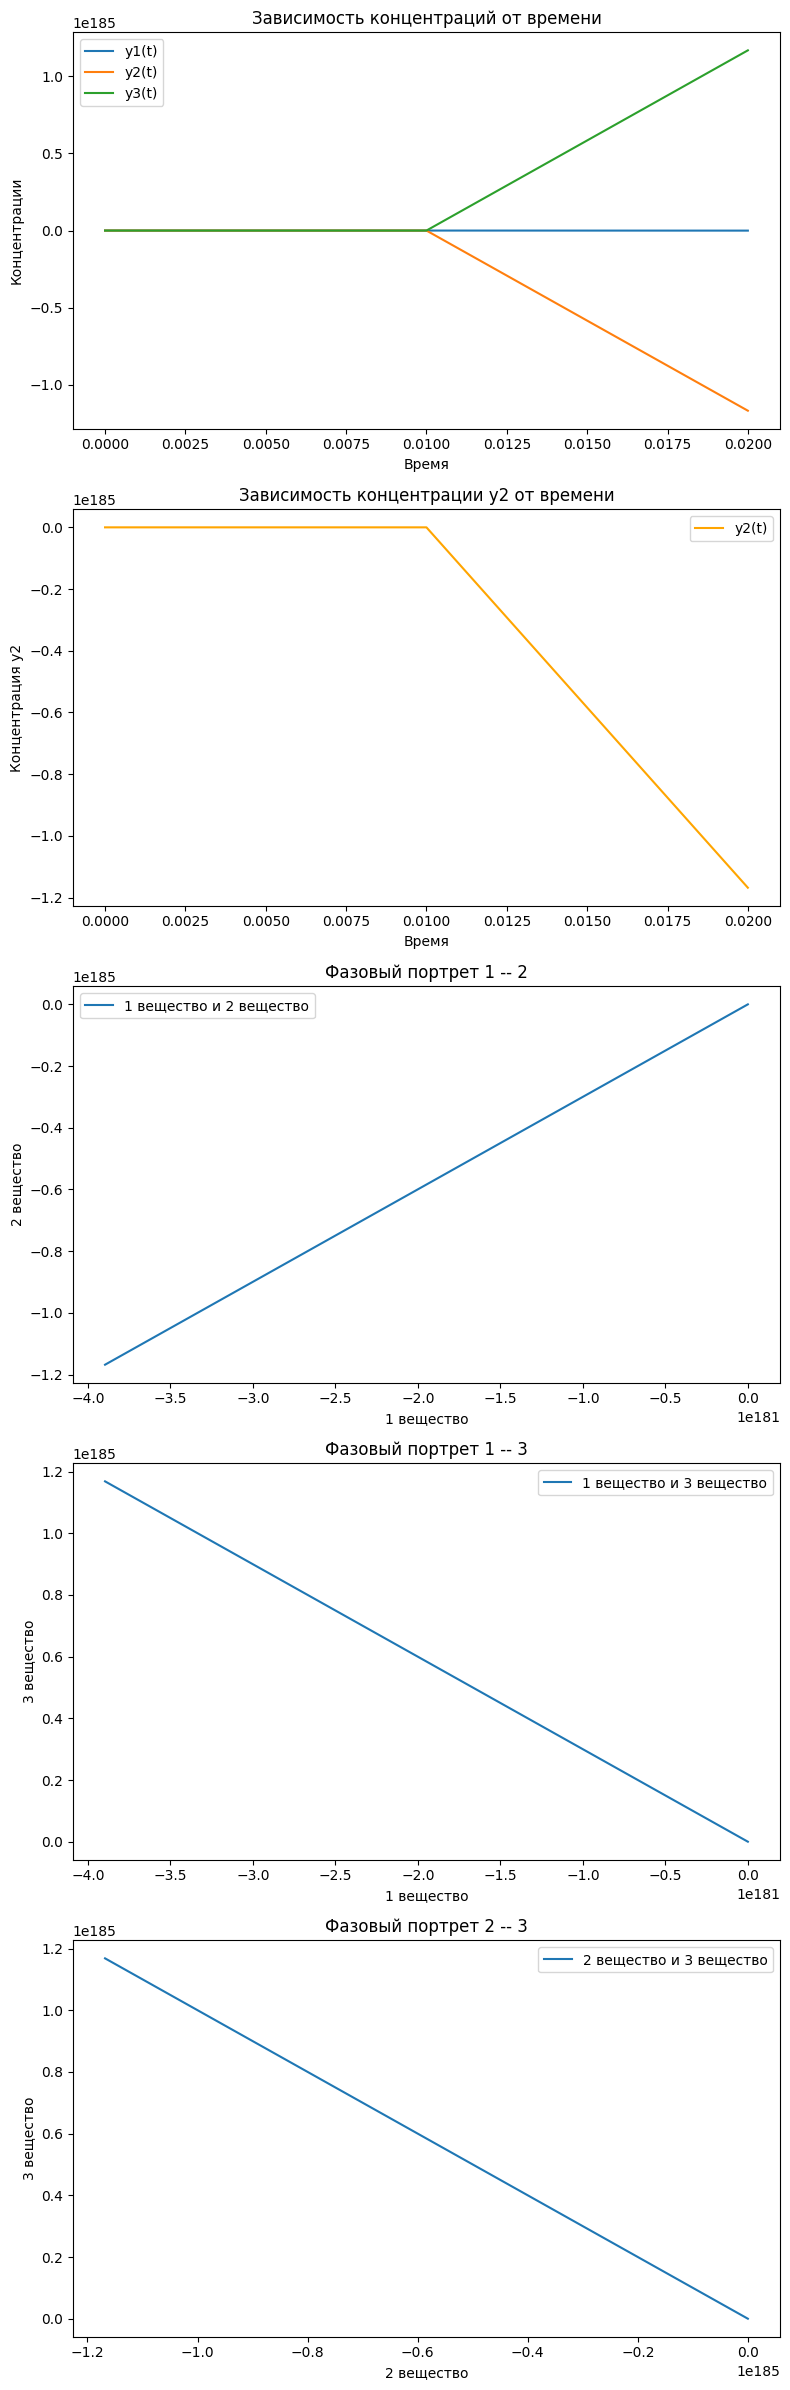

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Наша система уравнений
y0 = np.array([1.0, 0.0, 0.0])

def belousov_zhabotinsky(t, y):
    y1, y2, y3 = y
    dy1dt = -0.04 * y1 + 1e4 * y2 * y3
    dy2dt = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2**2
    dy3dt = 3e7 * y2**2
    return np.array([dy1dt, dy2dt, dy3dt])

# Метод Рунге-Кутты 4-го порядка
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h/2 * k2)
    k4 = f(t + h, y + h * k3)
    return y + h/6 * (k1 + 2*k2 + 2*k3 + k4)


t0 = 0
t_end = 1000
h = 1e-2
num_steps = int((t_end - t0) / h)


t_values = np.linspace(t0, t_end, num_steps)
y_values = np.zeros((num_steps, 3))
y_values[0] = y0

# Решение системы
for i in range(1, num_steps):
    y_values[i] = rk4_step(belousov_zhabotinsky, t_values[i-1], y_values[i-1], h)


# Построение графиков
plt.figure(figsize=(8, 24))

# Графики концентраций от времени
plt.subplot(5, 1, 1)
plt.plot(t_values, y_values[:, 0], label='y1(t)')
plt.plot(t_values, y_values[:, 1], label='y2(t)')
plt.plot(t_values, y_values[:, 2], label='y3(t)')
plt.xlabel('Время')
plt.ylabel('Концентрации')
plt.title('Зависимость концентраций от времени')
plt.legend()

# Отдельный график для y2
plt.subplot(5, 1, 2)
plt.plot(t_values, y_values[:, 1], label='y2(t)', color='orange')
plt.xlabel('Время')
plt.ylabel('Концентрация y2')
plt.title('Зависимость концентрации y2 от времени')
plt.legend()

# Фазовые портреты
plt.subplot(5, 1, 3)
plt.plot(y_values[:, 0], y_values[:, 1], label='1 вещество и 2 вещество')
plt.xlabel('1 вещество')
plt.ylabel('2 вещество')
plt.title('Фазовый портрет 1 -- 2')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(y_values[:, 0], y_values[:, 2], label='1 вещество и 3 вещество')
plt.xlabel('1 вещество')
plt.ylabel('3 вещество')
plt.title('Фазовый портрет 1 -- 3')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(y_values[:, 1], y_values[:, 2], label='2 вещество и 3 вещество')
plt.xlabel('2 вещество')
plt.ylabel('3 вещество')
plt.title('Фазовый портрет 2 -- 3')
plt.legend()

plt.tight_layout()
plt.show()


# 2) Неявный метод Рунге-Кутты 4го порядка

## Сам диагонально неявный метод Рунге-Кутта 4-го (DIRK4) порядка:

### Формулы для стадий метода DIRK4

1. **Первая стадия**:
   $ k_1 = f\left(t_n + c_1 h, y_n + h \left(a_{11} k_1\right)\right)$.
   Здесь $\ c_1 = \frac{1}{2} - \frac{\sqrt{3}}{6} $ и $ a_{11} = \frac{1}{4} $.

2. **Вторая стадия**:
   $ k_2 = f\left(t_n + c_2 h, y_n + h \left(a_{21} k_1 + a_{22} k_2\right)\right)$.
   Здесь $ c_2 = \frac{1}{2} + \frac{\sqrt{3}}{6} $, $ a_{21} = \frac{1}{2} $, и $ a_{22} = \frac{1}{4} $.

3. **Третья стадия**:
   $ k_3 = f\left(t_n + c_3 h, y_n + h \left(a_{31} k_1 + a_{32} k_2 + a_{33} k_3\right)\right)$.
   Здесь $ c_3 = \frac{1}{2} - \frac{\sqrt{3}}{6} $, $ a_{31} = \frac{1}{4} $, $ a_{32} = -\frac{\sqrt{3}}{6} $, и $ a_{33} = \frac{1}{4} $.

4. **Четвертая стадия**:
   $ k_4 = f\left(t_n + c_4 h, y_n + h \left(a_{41} k_1 + a_{42} k_2 + a_{43} k_3 + a_{44} k_4\right)\right)$.
   Здесь $ c_4 = \frac{1}{2} + \frac{\sqrt{3}}{6} $, $ a_{41} = \frac{1}{4} $, $ a_{42} = \frac{\sqrt{3}}{6} $, $ a_{43} = \frac{1}{4} $, и $ a_{44} = \frac{1}{4} $.

### Обновление решения
После вычисления всех $ k_i $, решение на следующем шаге $ y_{n+1} $ обновляется по формуле:
$ y_{n+1} = y_n + h \left(b_1 k_1 + b_2 k_2 + b_3 k_3 + b_4 k_4\right)$, где $ b_1 = b_2 = b_3 = b_4 = \frac{1}{4} $.

### Его таблица Бутчера:
|       |       |       |       |       |
|-------|-------|-------|-------|-------|
| **1/2 - sqrt(3)/6** | 1/4    | 0     | 0     | 0     |
| **1/2 + sqrt(3)/6**| 1/2   |  1/4    | 0     | 0     |
| **1/2 - sqrt(3)/6**| 1/4     | -sqrt(3)/6   | 1/4     | 0     |
| **1/2 + sqrt(3)/6**  | 1/4     | sqrt(3)/6     | 1/4     | 1/4     |
|       | **1/4**| **1/4**| **1/4**| **1/4**|

$$
A =
\begin{pmatrix}
1/4   & 0   & 0   & 0 \\
1/2 & 1/4   & 0   & 0 \\
1/4   & -sqrt(3)/6 & 1/4   & 0 \\
1/4   & sqrt(3)/6   & 1/4   & 1/4
\end{pmatrix}
$$

$$
b =
\begin{pmatrix}
1/4 & 1/4 & 1/4 & 1/4
\end{pmatrix}
$$

$$
c =
\begin{pmatrix}
1/2 - sqrt(3)/6   \\
1/2 + sqrt(3)/6 \\
1/2 - sqrt(3)/6 \\
1/2 + sqrt(3)/6
\end{pmatrix}
$$

## Исследуем наш метод на A-устойчивость и L-устойчивость:

$$
R(z) = \frac{\det(I - zA + z e b^T)}{\det(I - zA)}.
$$
В данном случае функция устойчивости имеет более сложный вид, поэтому вычислим её численно

### А-устойчивость

Метод называется А-устойчивым, если для всех $ z \in \mathbb{C} $ с $\operatorname{Re}(z) \leq 0$ выполняется условие: $ |R(z)| \leq 1$.

Данный метод, как диагонально неявный метод РК4, принадлежит к абсолютно устойчивым методам

### L-устойчивость

Из формы матрицы Бутчера легко увидеть, что:
$$
\begin{align*}
\lim_{z\to\infty}R(z)=С
\end{align*}
$$

Получаем, что метод для L-устойчивости не выполняется стремлению к нулю

Делаем вывод, что для данного уравнения
1) Метод A-уст
2) Метод не L-уст

# Эксперимент

При применение неявного метода DIRK4 можно увидеть заметное улучшение при том же шаге $h \approx 10^{-2}$. Можно так же заметить, что при $h \approx 10^{-4}$ для явного метода достигаются похожие результаты, как и при неявном, значит для явного метода хорошо подходит очень подробный шаг. Ниже так же будет приведено решение для другого диагонально неявного метода РК4 (Круза)

In [12]:
# Устойчивость

def stability_function(z):
    A = np.array([
        [1/4, 0, 0, 0],
        [1/2, 1/4, 0, 0],
        [1/4, -np.sqrt(3)/6, 1/4, 0],
        [1/4, np.sqrt(3)/6, 1/4, 1/4]
    ])
    b = np.array([1/4, 1/4, 1/4, 1/4])
    e = np.ones(4)
    
    I = np.eye(4)
    M1 = I - z * A
    M2 = M1 + z * np.outer(e, b)
    
    det_M1 = np.linalg.det(M1)
    det_M2 = np.linalg.det(M2)
    
    return det_M2 / det_M1

# Пример использования
z = -1e1  # Пример комплексного значения

R_z = stability_function(z)
print("R(z) =", R_z)

R(z) = 0.1490992495242735


Step 10000: y = [6.17773120e-01 6.15500361e-06 3.83017139e-01]
Step 20000: y = [5.36357724e-01 4.48905080e-06 4.64461226e-01]
Step 30000: y = [4.86742128e-01 3.70701910e-06 5.14092597e-01]
Step 40000: y = [4.50999384e-01 3.22420612e-06 5.49846065e-01]
Step 50000: y = [4.23135297e-01 2.88644382e-06 5.77718191e-01]
Step 60000: y = [4.00372444e-01 2.63237042e-06 6.00487421e-01]
Step 70000: y = [3.81187510e-01 2.43192631e-06 6.19677606e-01]
Step 80000: y = [3.64652009e-01 2.26836584e-06 6.36217549e-01]
Step 90000: y = [3.50157200e-01 2.13149937e-06 6.50716191e-01]


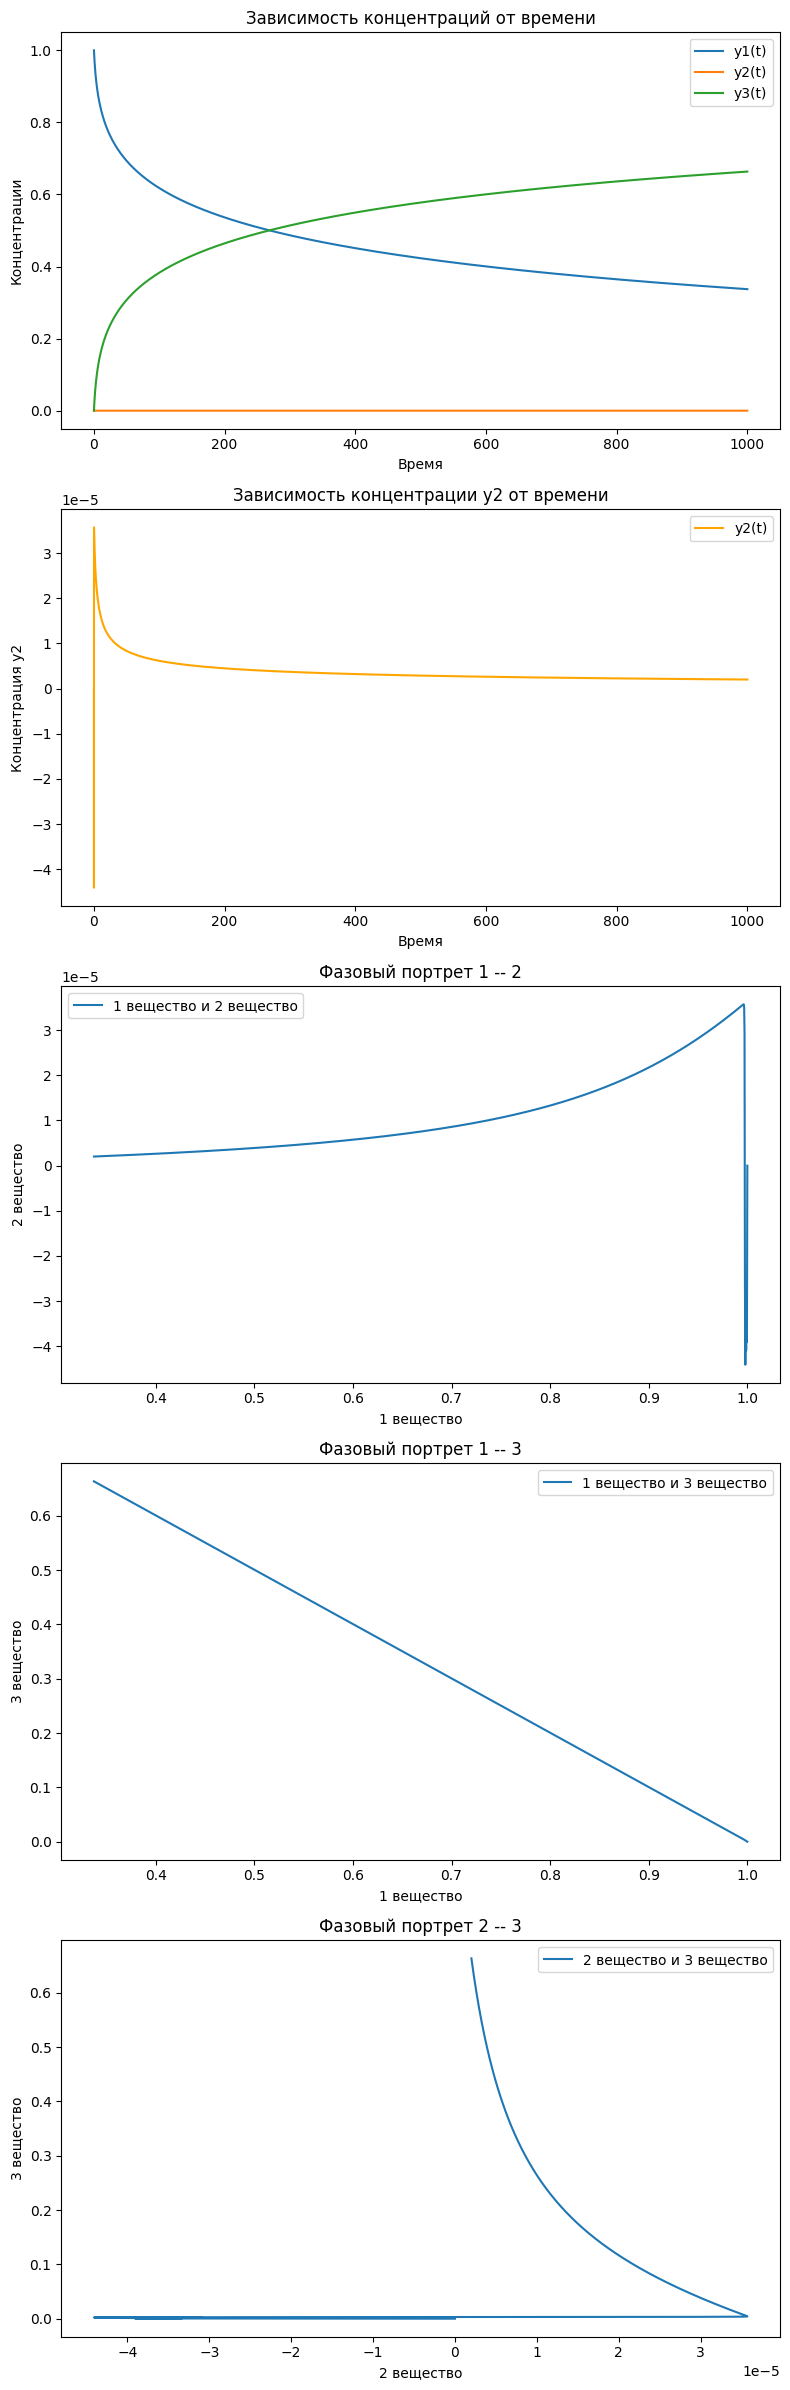

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Начальные условия
y0 = np.array([1.0, 0.0, 0.0])

# Система уравнений Белоусова-Жаботинского
def belousov_zhabotinsky(t, y):
    y1, y2, y3 = y
    dy1dt = -0.04 * y1 + 1e4 * y2 * y3
    dy2dt = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2**2
    dy3dt = 3e7 * y2**2
    return np.array([dy1dt, dy2dt, dy3dt])

# Метод Ньютона для скалярных функций с использованием направленных разностей
def newton_method_scalar(f, x0, tol=1e-8, max_iter=100, h_diff=1e-6):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        # Численная производная (направленная разность)
        dfx = (f(x + h_diff) - f(x)) / h_diff
        if dfx == 0:
            break
        delta = -fx / dfx
        x += delta
        if abs(delta) < tol:
            break
    return x

# DIRK4 метод
def dirk4_step(f, t, y, h):
    # Коэффициенты метода
    gamma = 1/4
    a21 = 1/2
    a31 = 1/4
    a32 = -np.sqrt(3)/6
    a41 = 1/4
    a42 = np.sqrt(3)/6
    a43 = 1/4
    b1 = b2 = b3 = b4 = 1/4

    # Вспомогательная функция для вычисления f(t, y)
    def f_helper(y):
        return f(t, y)

    # Вспомогательные функции для стадий
    def F1_k1(x):
        k1 = np.array([x, 0, 0])
        return k1[0] - f_helper(y + h * gamma * k1)[0]

    def F1_k2(x):
        k1 = np.array([0, x, 0])
        return k1[1] - f_helper(y + h * gamma * k1)[1]

    def F1_k3(x):
        k1 = np.array([0, 0, x])
        return k1[2] - f_helper(y + h * gamma * k1)[2]

    def F2_k1(x):
        k2 = np.array([x, 0, 0])
        return k2[0] - f_helper(y + h * (a21 * k1 + gamma * k2))[0]

    def F2_k2(x):
        k2 = np.array([0, x, 0])
        return k2[1] - f_helper(y + h * (a21 * k1 + gamma * k2))[1]

    def F2_k3(x):
        k2 = np.array([0, 0, x])
        return k2[2] - f_helper(y + h * (a21 * k1 + gamma * k2))[2]

    def F3_k1(x):
        k3 = np.array([x, 0, 0])
        return k3[0] - f_helper(y + h * (a31 * k1 + a32 * k2 + gamma * k3))[0]

    def F3_k2(x):
        k3 = np.array([0, x, 0])
        return k3[1] - f_helper(y + h * (a31 * k1 + a32 * k2 + gamma * k3))[1]

    def F3_k3(x):
        k3 = np.array([0, 0, x])
        return k3[2] - f_helper(y + h * (a31 * k1 + a32 * k2 + gamma * k3))[2]

    def F4_k1(x):
        k4 = np.array([x, 0, 0])
        return k4[0] - f_helper(y + h * (a41 * k1 + a42 * k2 + a43 * k3 + gamma * k4))[0]

    def F4_k2(x):
        k4 = np.array([0, x, 0])
        return k4[1] - f_helper(y + h * (a41 * k1 + a42 * k2 + a43 * k3 + gamma * k4))[1]

    def F4_k3(x):
        k4 = np.array([0, 0, x])
        return k4[2] - f_helper(y + h * (a41 * k1 + a42 * k2 + a43 * k3 + gamma * k4))[2]

    # Стадия 1
    k1 = np.array([
        newton_method_scalar(F1_k1, 0),
        newton_method_scalar(F1_k2, 0),
        newton_method_scalar(F1_k3, 0)
    ])

    # Стадия 2
    k2 = np.array([
        newton_method_scalar(F2_k1, 0),
        newton_method_scalar(F2_k2, 0),
        newton_method_scalar(F2_k3, 0)
    ])

    # Стадия 3
    k3 = np.array([
        newton_method_scalar(F3_k1, 0),
        newton_method_scalar(F3_k2, 0),
        newton_method_scalar(F3_k3, 0)
    ])

    # Стадия 4
    k4 = np.array([
        newton_method_scalar(F4_k1, 0),
        newton_method_scalar(F4_k2, 0),
        newton_method_scalar(F4_k3, 0)
    ])

    # Новое значение y
    return y + h * (b1 * k1 + b2 * k2 + b3 * k3 + b4 * k4)

# Параметры решения
t0 = 0
t_end = 1000
h = 1e-2
num_steps = int((t_end - t0) / h)

# Массивы для хранения результатов
t_values = np.linspace(t0, t_end, num_steps)
y_values = np.zeros((num_steps, 3))
y_values[0] = y0

# Решение системы
for i in range(1, num_steps):
    y_values[i] = dirk4_step(belousov_zhabotinsky, t_values[i-1], y_values[i-1], h)
    if i % 10000 == 0:  # Вывод каждые 10000 шагов для отладки
        print(f"Step {i}: y = {y_values[i]}")

# Построение графиков
plt.figure(figsize=(8, 24))

# Графики концентраций от времени
plt.subplot(5, 1, 1)
plt.plot(t_values, y_values[:, 0], label='y1(t)')
plt.plot(t_values, y_values[:, 1], label='y2(t)')
plt.plot(t_values, y_values[:, 2], label='y3(t)')
plt.xlabel('Время')
plt.ylabel('Концентрации')
plt.title('Зависимость концентраций от времени')
plt.legend()

# Отдельный график для y2
plt.subplot(5, 1, 2)
plt.plot(t_values, y_values[:, 1], label='y2(t)', color='orange')
plt.xlabel('Время')
plt.ylabel('Концентрация y2')
plt.title('Зависимость концентрации y2 от времени')
plt.legend()

# Фазовые портреты
plt.subplot(5, 1, 3)
plt.plot(y_values[:, 0], y_values[:, 1], label='1 вещество и 2 вещество')
plt.xlabel('1 вещество')
plt.ylabel('2 вещество')
plt.title('Фазовый портрет 1 -- 2')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(y_values[:, 0], y_values[:, 2], label='1 вещество и 3 вещество')
plt.xlabel('1 вещество')
plt.ylabel('3 вещество')
plt.title('Фазовый портрет 1 -- 3')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(y_values[:, 1], y_values[:, 2], label='2 вещество и 3 вещество')
plt.xlabel('2 вещество')
plt.ylabel('3 вещество')
plt.title('Фазовый портрет 2 -- 3')
plt.legend()

plt.tight_layout()
plt.show()

# 3) Неявный метод РК4 (метод Круза)
Проверим так же трёхэтапный неявный метод Крузе 4го порядка, с отдельным выводом для концентраций y2. По всей видимости их количество слишком мало, что отразиться на графике вместе с y1 и y3:

Step 10000: y = [6.18511516e-01 6.15700233e-06 3.83376748e-01]
Step 20000: y = [5.37120878e-01 4.49138716e-06 4.64895159e-01]
Step 30000: y = [4.87501768e-01 3.70932936e-06 5.14585135e-01]
Step 40000: y = [4.51748685e-01 3.22644195e-06 5.50386626e-01]
Step 50000: y = [4.23872216e-01 2.88860072e-06 5.78299490e-01]
Step 60000: y = [4.01096500e-01 2.63445295e-06 6.01104146e-01]
Step 70000: y = [3.81898825e-01 2.43394078e-06 6.20325700e-01]
Step 80000: y = [3.65350950e-01 2.27031840e-06 6.36893802e-01]
Step 90000: y = [3.50844230e-01 2.13339554e-06 6.51417998e-01]


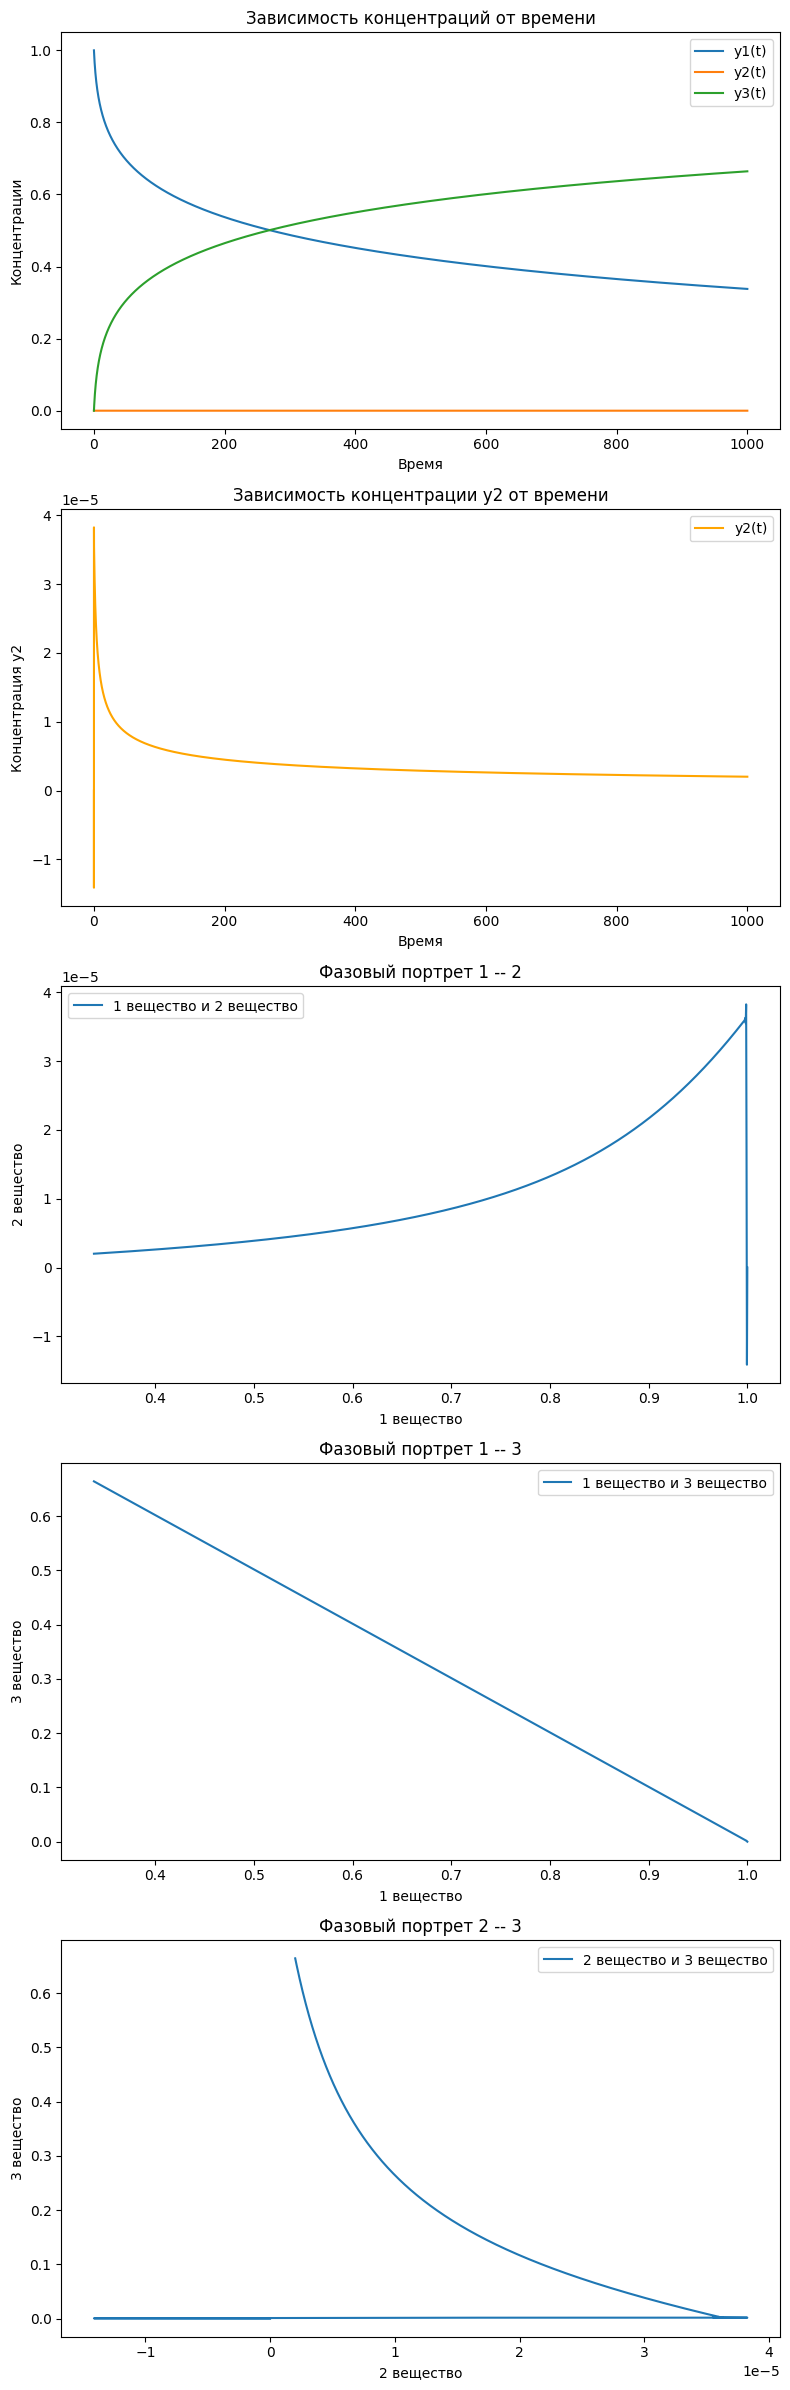

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Начальные условия
y0 = np.array([1.0, 0.0, 0.0])

# Система уравнений Белоусова-Жаботинского
def belousov_zhabotinsky(t, y):
    y1, y2, y3 = y
    dy1dt = -0.04 * y1 + 1e4 * y2 * y3
    dy2dt = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2**2
    dy3dt = 3e7 * y2**2
    return np.array([dy1dt, dy2dt, dy3dt])

# Метод Ньютона для скалярных функций с использованием направленных разностей
def newton_method_scalar(f, x0, tol=1e-8, max_iter=100, h_diff=1e-6):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        # Численная производная (направленная разность)
        dfx = (f(x + h_diff) - f(x)) / h_diff
        if dfx == 0:
            break
        delta = -fx / dfx
        x += delta
        if abs(delta) < tol:
            break
    return x

# Crouzeix's three-stage метод
def crouzeix_step(f, t, y, h):
    alpha = (2 / np.sqrt(3)) * np.cos(np.pi / 18)
    
    # Коэффициенты метода
    a11 = (1 + alpha) / 2
    a12 = 0
    a13 = 0
    a21 = -alpha / 2
    a22 = (1 + alpha) / 2
    a23 = 0
    a31 = 1 + alpha
    a32 = -(1 + 2 * alpha)
    a33 = 1 + alpha
    b1 = 1 / (6 * (alpha ** 2))
    b2 = 1- 1 / (3 * (alpha ** 2))
    b3 = 1 / (6 * (alpha ** 2))

    # Коэффициенты c_i
    c1 = 1 + alpha
    c2 = 1
    c3 = (1 - alpha) / 2 - alpha

    # Вспомогательная функция для вычисления f(t, y)
    def f_helper(y):
        return f(t, y)

    # Вспомогательные функции для стадий
    def F1_k1(x):
        k1 = np.array([x, 0, 0])
        return k1[0] - f_helper(y + h * a11 * k1)[0]

    def F1_k2(x):
        k1 = np.array([0, x, 0])
        return k1[1] - f_helper(y + h * a11 * k1)[1]

    def F1_k3(x):
        k1 = np.array([0, 0, x])
        return k1[2] - f_helper(y + h * a11 * k1)[2]

    def F2_k1(x):
        k2 = np.array([x, 0, 0])
        return k2[0] - f_helper(y + h * (a21 * k1 + a22 * k2))[0]

    def F2_k2(x):
        k2 = np.array([0, x, 0])
        return k2[1] - f_helper(y + h * (a21 * k1 + a22 * k2))[1]

    def F2_k3(x):
        k2 = np.array([0, 0, x])
        return k2[2] - f_helper(y + h * (a21 * k1 + a22 * k2))[2]

    def F3_k1(x):
        k3 = np.array([x, 0, 0])
        return k3[0] - f_helper(y + h * (a31 * k1 + a32 * k2 + a33 * k3))[0]

    def F3_k2(x):
        k3 = np.array([0, x, 0])
        return k3[1] - f_helper(y + h * (a31 * k1 + a32 * k2 + a33 * k3))[1]

    def F3_k3(x):
        k3 = np.array([0, 0, x])
        return k3[2] - f_helper(y + h * (a31 * k1 + a32 * k2 + a33 * k3))[2]

    # Стадия 1
    k1 = np.array([
        newton_method_scalar(F1_k1, 0),
        newton_method_scalar(F1_k2, 0),
        newton_method_scalar(F1_k3, 0)
    ])

    # Стадия 2
    k2 = np.array([
        newton_method_scalar(F2_k1, 0),
        newton_method_scalar(F2_k2, 0),
        newton_method_scalar(F2_k3, 0)
    ])

    # Стадия 3
    k3 = np.array([
        newton_method_scalar(F3_k1, 0),
        newton_method_scalar(F3_k2, 0),
        newton_method_scalar(F3_k3, 0)
    ])

    # Новое значение y
    return y + h * (b1 * k1 + b2 * k2 + b3 * k3)

# Параметры решения
t0 = 0
t_end = 1000
h = 1e-2
num_steps = int((t_end - t0) / h)

# Массивы для хранения результатов
t_values = np.linspace(t0, t_end, num_steps)
y_values = np.zeros((num_steps, 3))
y_values[0] = y0

# Решение системы
for i in range(1, num_steps):
    y_values[i] = crouzeix_step(belousov_zhabotinsky, t_values[i-1], y_values[i-1], h)
    if i % 10000 == 0:  # Вывод каждые 10000 шагов для отладки
        print(f"Step {i}: y = {y_values[i]}")

# Построение графиков
plt.figure(figsize=(8, 24))

# Графики концентраций от времени
plt.subplot(5, 1, 1)
plt.plot(t_values, y_values[:, 0], label='y1(t)')
plt.plot(t_values, y_values[:, 1], label='y2(t)')
plt.plot(t_values, y_values[:, 2], label='y3(t)')
plt.xlabel('Время')
plt.ylabel('Концентрации')
plt.title('Зависимость концентраций от времени')
plt.legend()

# Отдельный график для y2
plt.subplot(5, 1, 2)
plt.plot(t_values, y_values[:, 1], label='y2(t)', color='orange')
plt.xlabel('Время')
plt.ylabel('Концентрация y2')
plt.title('Зависимость концентрации y2 от времени')
plt.legend()

# Фазовые портреты
plt.subplot(5, 1, 3)
plt.plot(y_values[:, 0], y_values[:, 1], label='1 вещество и 2 вещество')
plt.xlabel('1 вещество')
plt.ylabel('2 вещество')
plt.title('Фазовый портрет 1 -- 2')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(y_values[:, 0], y_values[:, 2], label='1 вещество и 3 вещество')
plt.xlabel('1 вещество')
plt.ylabel('3 вещество')
plt.title('Фазовый портрет 1 -- 3')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(y_values[:, 1], y_values[:, 2], label='2 вещество и 3 вещество')
plt.xlabel('2 вещество')
plt.ylabel('3 вещество')
plt.title('Фазовый портрет 2 -- 3')
plt.legend()

plt.tight_layout()
plt.show()

In [15]:
# 3 порядок
b = [1/6, 2/3, 1/6]
c = [0, 1/2, 1]
A = [[0, 0, 0],[1/2, 0, 0],[0, 1, 0]]

sum = 0

for i in range(3):
    for j in range(3):
        sum += b[i] * A[i][j] * c[j]

print(sum)
print(1/6)

0.08333333333333333
0.16666666666666666


Step 10000: y = [6.18511516e-01 6.15700233e-06 3.83376748e-01]
Step 20000: y = [5.37120878e-01 4.49138716e-06 4.64895159e-01]
Step 30000: y = [4.87501768e-01 3.70932936e-06 5.14585135e-01]
Step 40000: y = [4.51748685e-01 3.22644195e-06 5.50386626e-01]
Step 50000: y = [4.23872216e-01 2.88860072e-06 5.78299490e-01]
Step 60000: y = [4.01096500e-01 2.63445295e-06 6.01104146e-01]
Step 70000: y = [3.81898825e-01 2.43394078e-06 6.20325700e-01]
Step 80000: y = [3.65350950e-01 2.27031840e-06 6.36893802e-01]
Step 90000: y = [3.50844230e-01 2.13339554e-06 6.51417998e-01]


C:\Users\maslo\AppData\Local\Temp\ipykernel_7512\858851367.py:211: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\maslo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


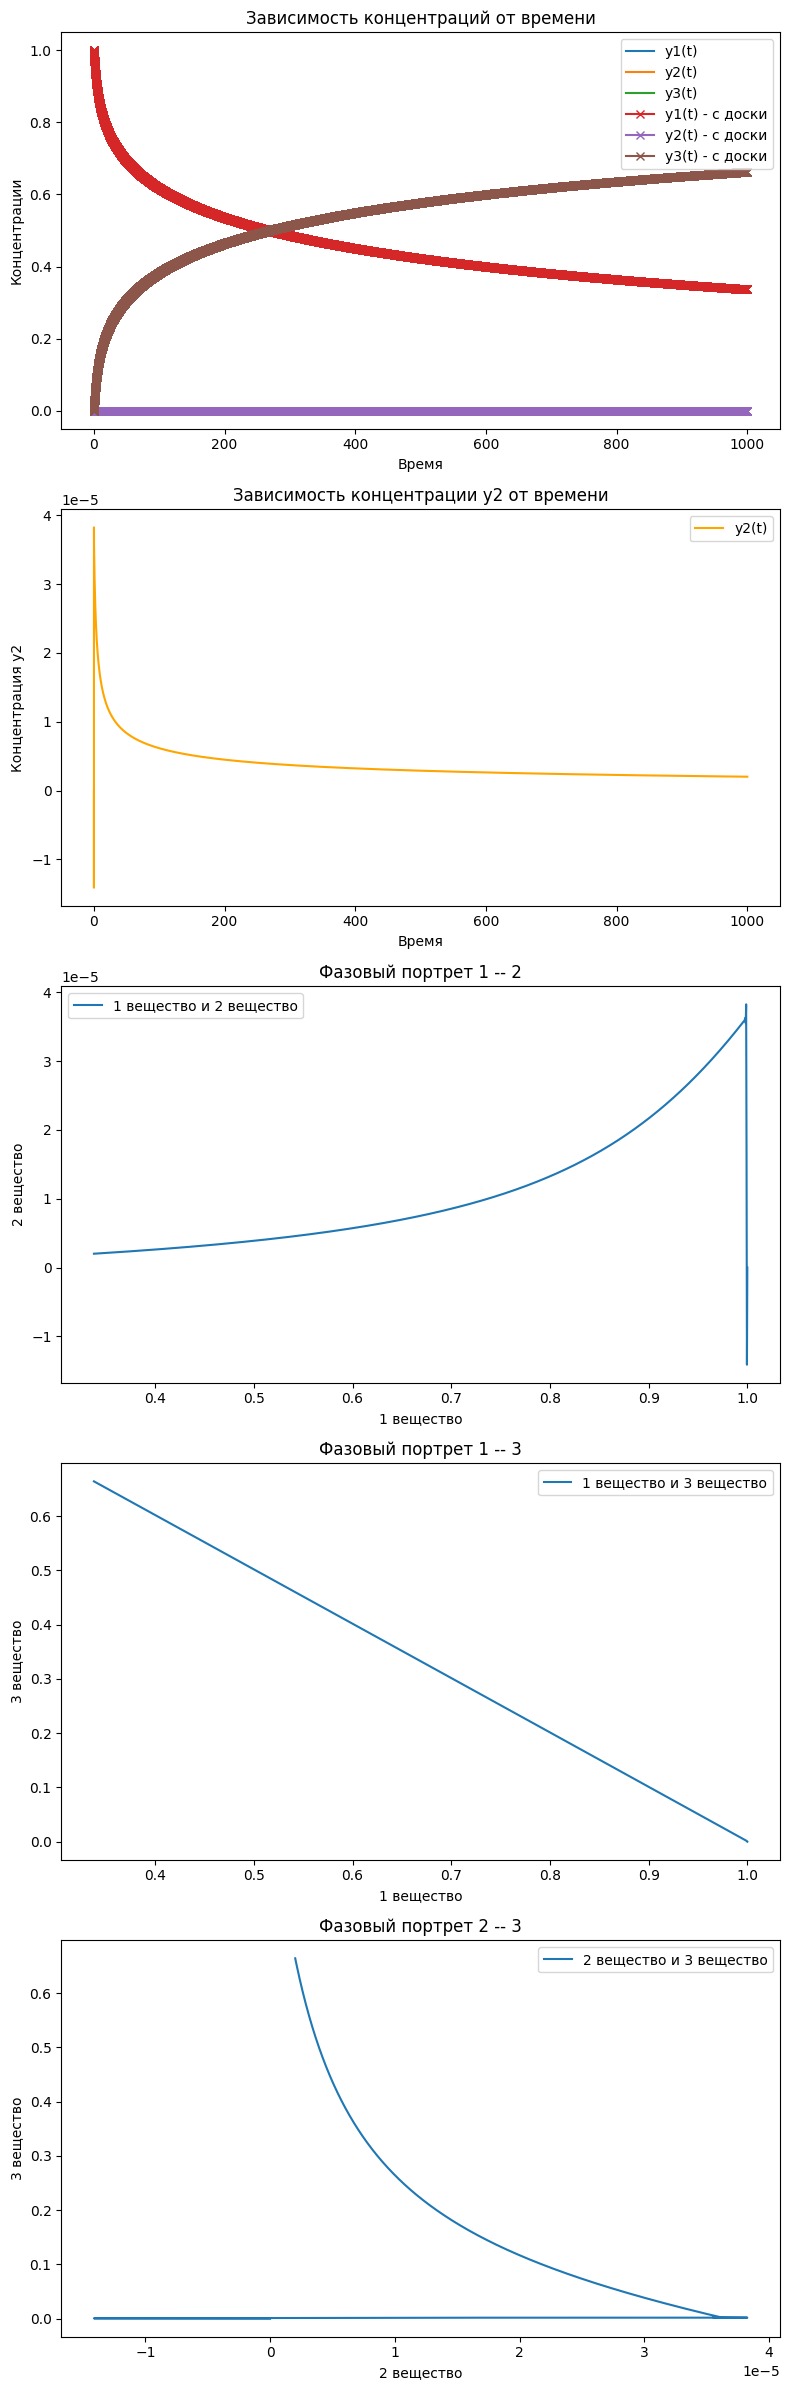

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Начальные условия
y0 = np.array([1.0, 0.0, 0.0])

# Система уравнений Белоусова-Жаботинского
def belousov_zhabotinsky(t, y):
    y1, y2, y3 = y
    dy1dt = -0.04 * y1 + 1e4 * y2 * y3
    dy2dt = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2**2
    dy3dt = 3e7 * y2**2
    return np.array([dy1dt, dy2dt, dy3dt])

# Метод Ньютона для скалярных функций с использованием направленных разностей
def newton_method_scalar(f, x0, tol=1e-8, max_iter=100, h_diff=1e-6):
    x = x0
    for _ in range(max_iter):
        fx = f(x)
        # Численная производная (направленная разность)
        dfx = (f(x + h_diff) - f(x)) / h_diff
        if dfx == 0:
            break
        delta = -fx / dfx
        x += delta
        if abs(delta) < tol:
            break
    return x

# Crouzeix's three-stage метод
def crouzeix_step(f, t, y, h):
    alpha = (2 / np.sqrt(3)) * np.cos(np.pi / 18)
    
    # Коэффициенты метода
    a11 = (1 + alpha) / 2
    a12 = 0
    a13 = 0
    a21 = -alpha / 2
    a22 = (1 + alpha) / 2
    a23 = 0
    a31 = 1 + alpha
    a32 = -(1 + 2 * alpha)
    a33 = 1 + alpha
    b1 = 1 / (6 * (alpha ** 2))
    b2 = 1- 1 / (3 * (alpha ** 2))
    b3 = 1 / (6 * (alpha ** 2))

    # Вспомогательная функция для вычисления f(t, y)
    def f_helper(y):
        return f(t, y)

    # Вспомогательные функции для стадий
    def F1_k1(x):
        k1 = np.array([x, 0, 0])
        return k1[0] - f_helper(y + h * a11 * k1)[0]

    def F1_k2(x):
        k1 = np.array([0, x, 0])
        return k1[1] - f_helper(y + h * a11 * k1)[1]

    def F1_k3(x):
        k1 = np.array([0, 0, x])
        return k1[2] - f_helper(y + h * a11 * k1)[2]

    def F2_k1(x):
        k2 = np.array([x, 0, 0])
        return k2[0] - f_helper(y + h * (a21 * k1 + a22 * k2))[0]

    def F2_k2(x):
        k2 = np.array([0, x, 0])
        return k2[1] - f_helper(y + h * (a21 * k1 + a22 * k2))[1]

    def F2_k3(x):
        k2 = np.array([0, 0, x])
        return k2[2] - f_helper(y + h * (a21 * k1 + a22 * k2))[2]

    def F3_k1(x):
        k3 = np.array([x, 0, 0])
        return k3[0] - f_helper(y + h * (a31 * k1 + a32 * k2 + a33 * k3))[0]

    def F3_k2(x):
        k3 = np.array([0, x, 0])
        return k3[1] - f_helper(y + h * (a31 * k1 + a32 * k2 + a33 * k3))[1]

    def F3_k3(x):
        k3 = np.array([0, 0, x])
        return k3[2] - f_helper(y + h * (a31 * k1 + a32 * k2 + a33 * k3))[2]

    # Стадия 1
    k1 = np.array([
        newton_method_scalar(F1_k1, 0),
        newton_method_scalar(F1_k2, 0),
        newton_method_scalar(F1_k3, 0)
    ])

    # Стадия 2
    k2 = np.array([
        newton_method_scalar(F2_k1, 0),
        newton_method_scalar(F2_k2, 0),
        newton_method_scalar(F2_k3, 0)
    ])

    # Стадия 3
    k3 = np.array([
        newton_method_scalar(F3_k1, 0),
        newton_method_scalar(F3_k2, 0),
        newton_method_scalar(F3_k3, 0)
    ])

    # Новое значение y
    return y + h * (b1 * k1 + b2 * k2 + b3 * k3)


# Параметры решения
t0 = 0
t_end = 1000
h = 1e-2
num_steps = int((t_end - t0) / h)

# Массивы для хранения результатов
t_values = np.linspace(t0, t_end, num_steps)
y_values = np.zeros((num_steps, 3))
y_values[0] = y0

# Решение системы
for i in range(1, num_steps):
    y_values[i] = crouzeix_step(belousov_zhabotinsky, t_values[i-1], y_values[i-1], h)
    if i % 10000 == 0:  # Вывод каждые 10000 шагов для отладки
        print(f"Step {i}: y = {y_values[i]}")





# МЕТОД С ДОСКИ
y0_d = np.array([1.0, 0.0, 0.0])

def belousov_zhabotinsky(t, y):
    y1, y2, y3 = y
    dy1dt = -0.04 * y1 + 1e4 * y2 * y3
    dy2dt = 0.04 * y1 - 1e4 * y2 * y3 - 3e7 * y2**2
    dy3dt = 3e7 * y2**2
    return np.array([dy1dt, dy2dt, dy3dt])

# Метод Рунге-Кутты 4-го порядка
def rk4_step(f, t, y, h):
    k1 = f(t, y)
    k2 = f(t + h/2, y + h/2 * k1)
    k3 = f(t + h/2, y + h * k2)
    return y + h/6 * (k1 + 4*k2 + k3)


t0 = 0
t_end = 1000
h = 1e-4
num_steps = int((t_end - t0) / h)

t_values_d = np.linspace(t0, t_end, num_steps)
y_values_d = np.zeros((num_steps, 3))
y_values_d[0] = y0_d

# Решение системы
for i in range(1, num_steps):
    y_values_d[i] = rk4_step(belousov_zhabotinsky, t_values_d[i-1], y_values_d[i-1], h)


# Построение графиков
plt.figure(figsize=(8, 24))

# Графики концентраций от времени
plt.subplot(5, 1, 1)
plt.plot(t_values, y_values[:, 0], label='y1(t)')
plt.plot(t_values, y_values[:, 1], label='y2(t)')
plt.plot(t_values, y_values[:, 2], label='y3(t)')
plt.plot(t_values_d, y_values_d[:, 0], label='y1(t) - с доски', marker='x')
plt.plot(t_values_d, y_values_d[:, 1], label='y2(t) - с доски', marker='x')
plt.plot(t_values_d, y_values_d[:, 2], label='y3(t) - с доски', marker='x')
plt.xlabel('Время')
plt.ylabel('Концентрации')
plt.title('Зависимость концентраций от времени')
plt.legend()

# Отдельный график для y2
plt.subplot(5, 1, 2)
plt.plot(t_values, y_values[:, 1], label='y2(t)', color='orange')
plt.xlabel('Время')
plt.ylabel('Концентрация y2')
plt.title('Зависимость концентрации y2 от времени')
plt.legend()

# Фазовые портреты
plt.subplot(5, 1, 3)
plt.plot(y_values[:, 0], y_values[:, 1], label='1 вещество и 2 вещество')
plt.xlabel('1 вещество')
plt.ylabel('2 вещество')
plt.title('Фазовый портрет 1 -- 2')
plt.legend()

plt.subplot(5, 1, 4)
plt.plot(y_values[:, 0], y_values[:, 2], label='1 вещество и 3 вещество')
plt.xlabel('1 вещество')
plt.ylabel('3 вещество')
plt.title('Фазовый портрет 1 -- 3')
plt.legend()

plt.subplot(5, 1, 5)
plt.plot(y_values[:, 1], y_values[:, 2], label='2 вещество и 3 вещество')
plt.xlabel('2 вещество')
plt.ylabel('3 вещество')
plt.title('Фазовый портрет 2 -- 3')
plt.legend()

plt.tight_layout()
plt.show()

